# GRIP - THE SPARKS FOUNDATION

### DATA SCIENCE & BUSINESS ANALYTICS TASK - 6 [ PREDICTION USING DECISION TREE ALGORITHM ]

### AUTHOR : AISHWARYA K
_________________________________________________________________________________________________________

### TASK 6
Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the righ class accordingly. 
 

### IMPORTING THE REQUIRED LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### LOAD THE DATASET

In [3]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
print(data.feature_names)
print("\n")

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']




In [4]:
df['target'] = data.target

In [5]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### SPLIT TRAINING AND TEST DATASET

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], test_size = 0.3)
print(len(X_train))
print(len(X_test))

105
45


### PLOTTING DISTRIBUTION OF DATA 

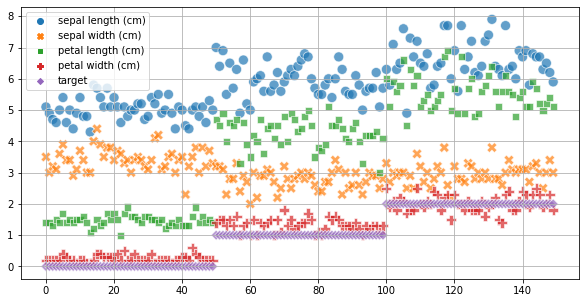

In [8]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, s=100, alpha=0.7)
plt.grid()

### FIT DATASET FOR TRAINING AND TESTING

In [9]:
# DT = DecisionTreeClassifier()
DT = DecisionTreeClassifier(criterion="gini")
# Fit model
model = DT.fit(X_train, Y_train)
y_preds = model.predict(X_test)
print(y_preds)
print(data.feature_names)
print("\n")

[0 0 2 1 1 1 1 2 2 2 1 0 1 0 1 1 1 0 2 0 1 2 2 1 0 2 2 0 1 1 2 2 1 1 0 2 1
 1 0 2 0 0 0 0 1]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']




### EVALUATING THE PERFORMANCE OF ALGORITHM

#### DECISION TREE CLASSIFICATION

[Text(1240.0, 1730.2083333333333, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 105\nvalue = [36, 33, 36]\nclass = setosa'),
 Text(930.0, 1415.625, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = setosa'),
 Text(1550.0, 1415.625, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 69\nvalue = [0, 33, 36]\nclass = virginica'),
 Text(620.0, 1101.0416666666667, 'petal length (cm) <= 4.95\ngini = 0.198\nsamples = 36\nvalue = [0, 32, 4]\nclass = versicolor'),
 Text(310.0, 786.4583333333335, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = versicolor'),
 Text(930.0, 786.4583333333335, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(620.0, 471.875, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(1240.0, 471.875, 'sepal length (cm) <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]\nclass = versicolor'),
 Text(930.0, 157.29166666666674, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = versicolor'

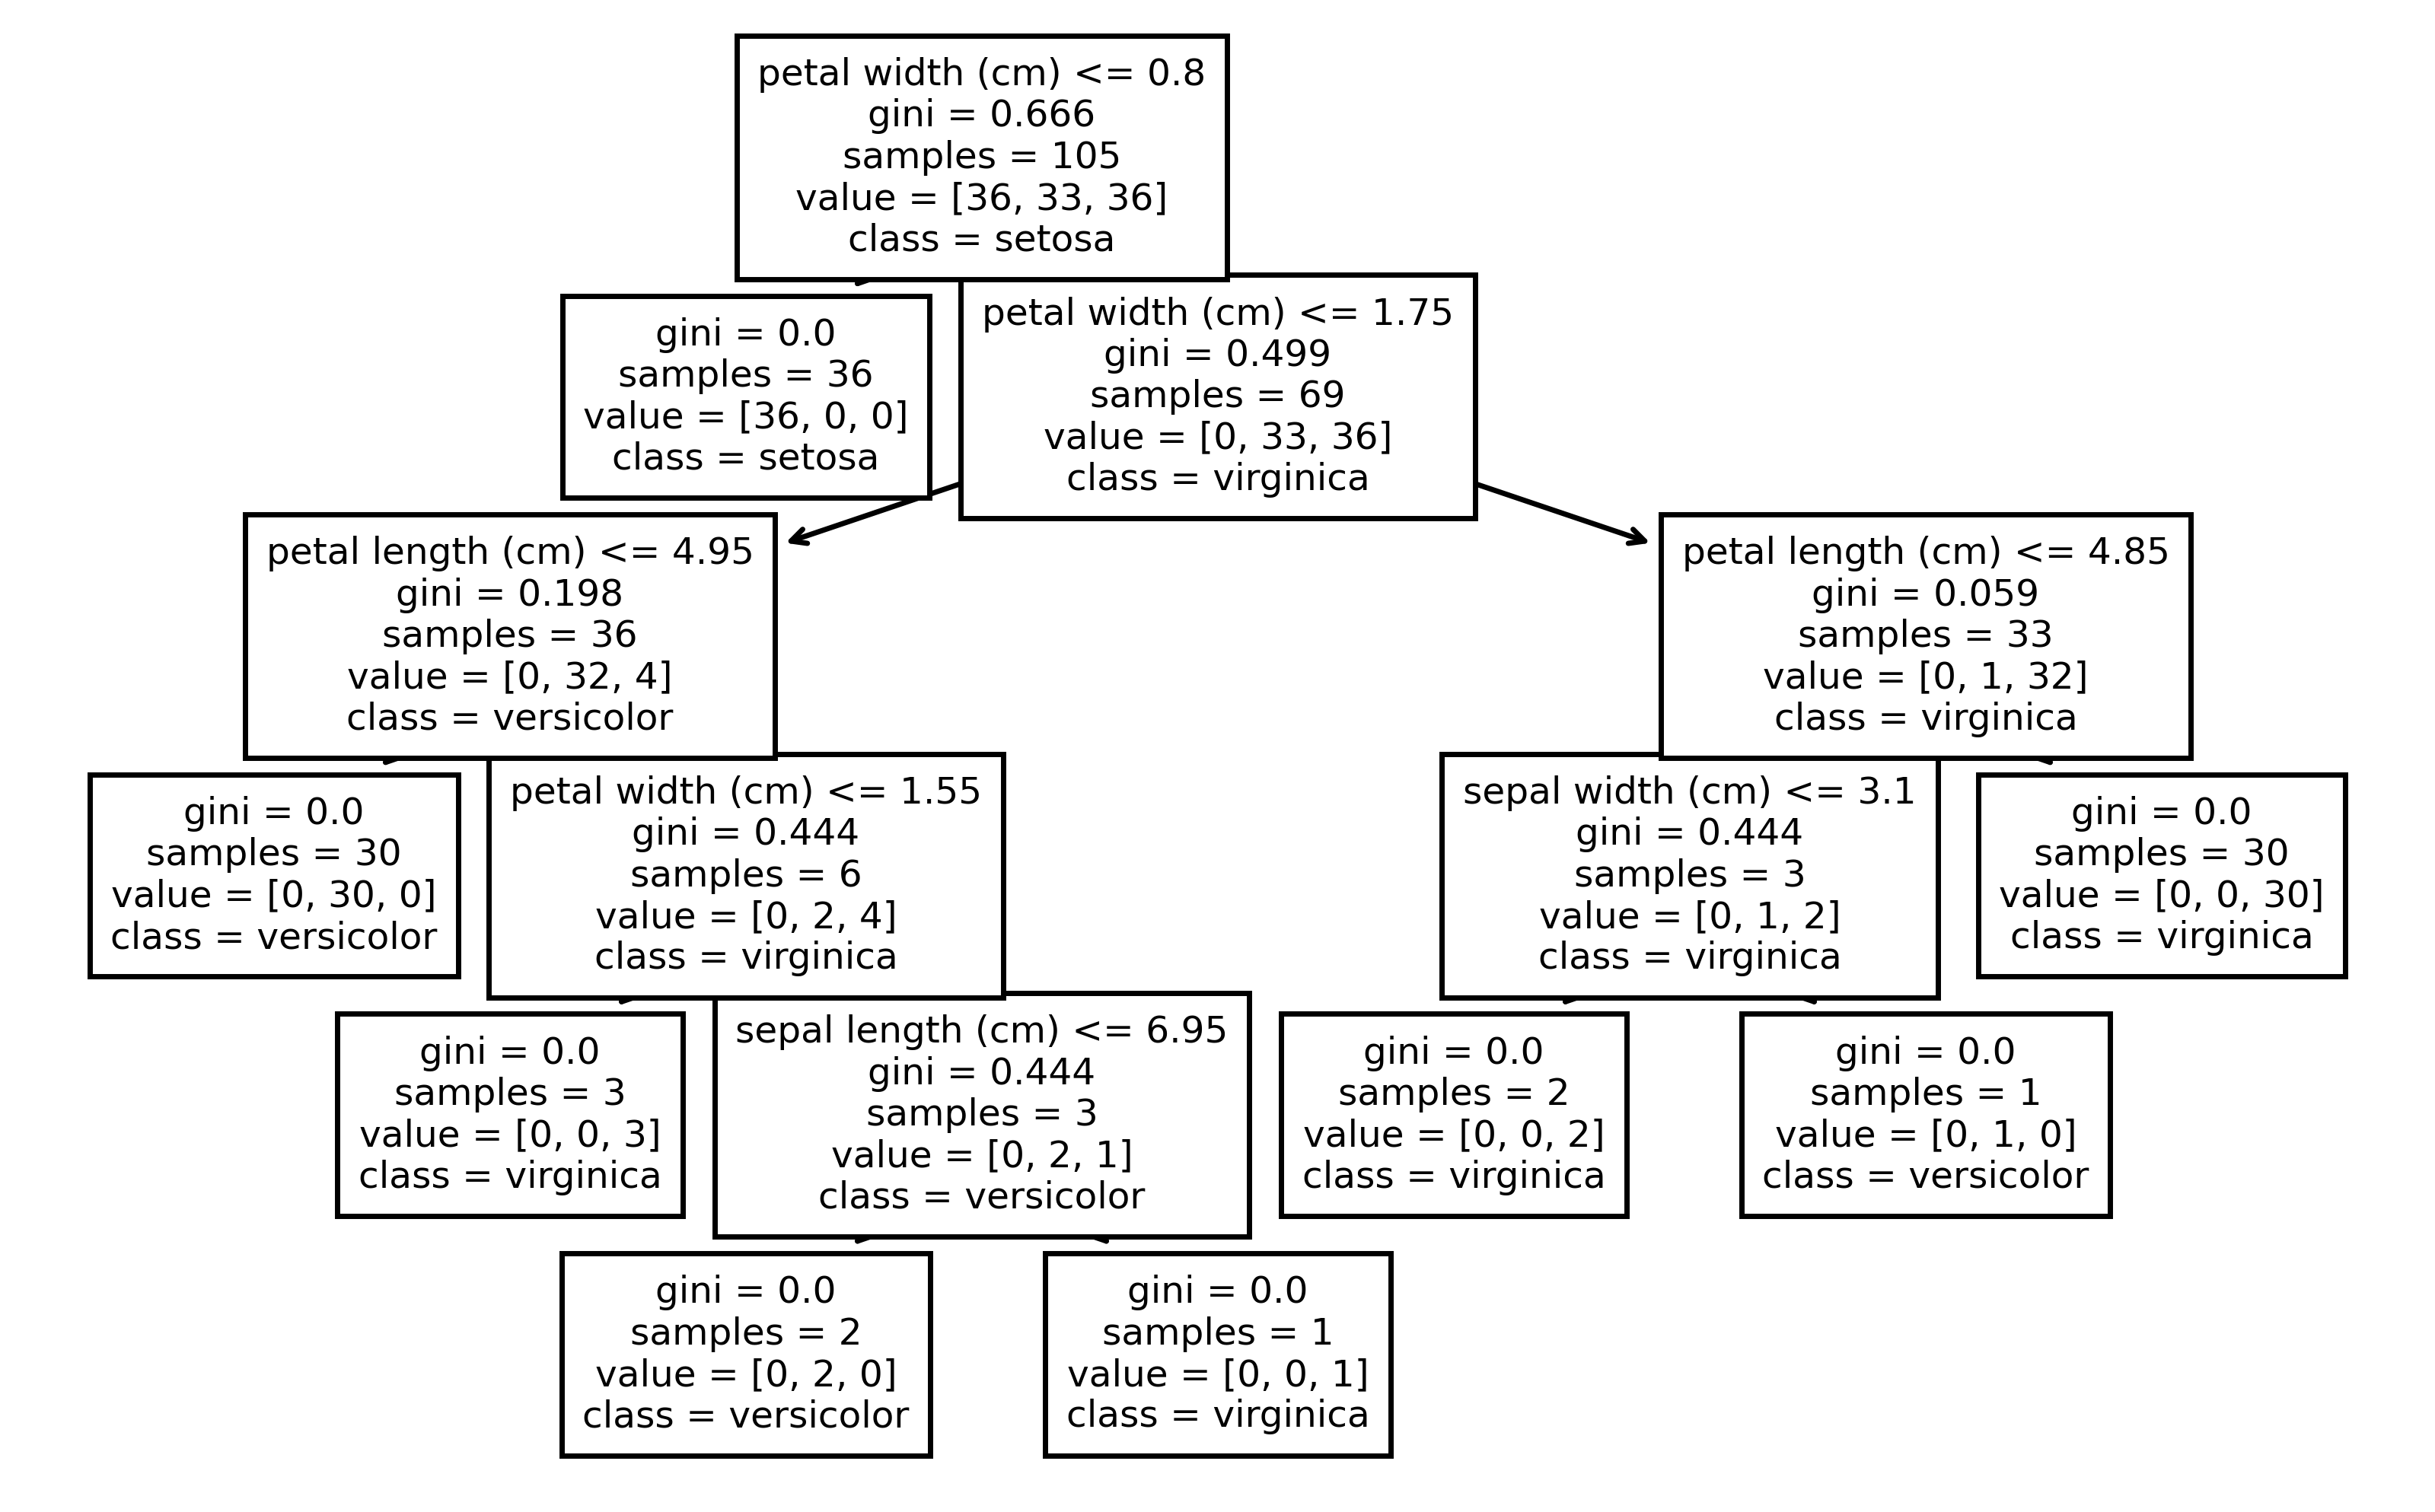

In [10]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,5), dpi=500)
tree.plot_tree(DT,fontsize=7, feature_names=data.feature_names, class_names=data.target_names)

#### CONFUSION MATRIX

In [11]:
labels=[0,1,2]
cmx=confusion_matrix(Y_test,y_preds, labels)
print("\n Confustion Matrix : \n",cmx)
print("\n")


 Confustion Matrix : 
 [[14  0  0]
 [ 0 17  0]
 [ 0  1 13]]




C:\Users\Aishwarya Kanish\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


#### CLASSIFICATION REPORT

In [12]:
print("\n")
print(classification_report(Y_test, y_preds))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## THANK YOU